<a href="https://colab.research.google.com/github/ponwinsiya2348539/expense_tracket_ADT/blob/main/2348539_lab1aml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('/content/Program_1_Dataset - Program_1_Dataset.csv')

In [3]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [4]:
df.tail()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
501,12.80230,0.0,18.1,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8
502,10.67180,0.0,18.1,0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98,11.8
503,6.28807,0.0,18.1,0,0.740,6.341,96.4,2.0720,24,666,20.2,318.01,17.79,14.9
504,9.92485,0.0,18.1,0,0.740,6.251,96.6,2.1980,24,666,20.2,388.52,16.44,12.6
505,9.32909,0.0,18.1,0,0.713,6.185,98.7,2.2616,24,666,20.2,396.90,18.13,14.1


In [5]:
df.shape

(506, 14)

In [6]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [7]:
print(df.columns)

Index(['Crime_Rate', 'Zone_proportion', 'Non_Retail_Acres', 'CHAS', 'NOX',
       'Avg_rooms', 'AGE', 'Distance', 'RAD', 'Property_TaxRate', 'PTRATIO',
       'B', 'LSTAT', 'MValue'],
      dtype='object')


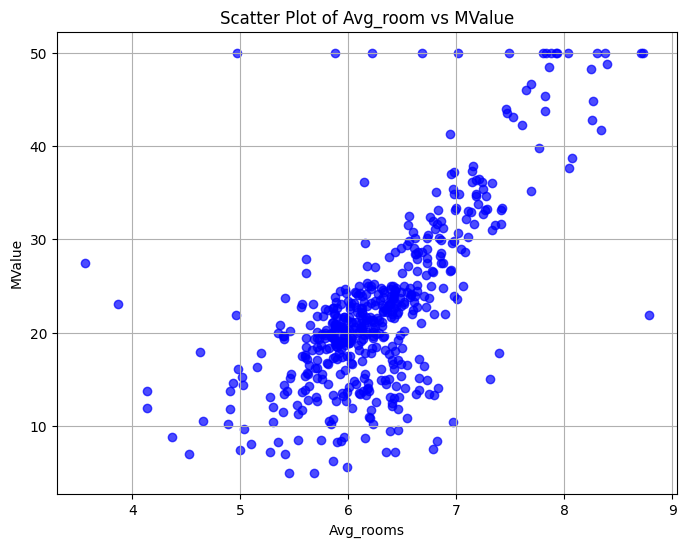

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Avg_rooms'], df['MValue'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Avg_room vs MValue')
plt.xlabel('Avg_rooms')
plt.ylabel('MValue')
plt.grid(True)
plt.show()

In [11]:
#3. Split the data into train and test datasets in a 70:30 ratio
X = df[['Avg_rooms']]  # Predictor
y = df['MValue']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# 4. Build a Linear Regression model using the training dataset
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# 5. Obtain the coefficient and intercept values for the model
coeff = model.coef_[0]
intercept = model.intercept_
print(f'Coefficient: {coeff}')
print(f'Intercept: {intercept}')

Coefficient: 8.926202222337784
Intercept: -33.510147597513345


In [14]:
# 6. Evaluate the model using MSE and R-squared values on both training and testing datasets
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f'Training MSE: {train_mse}')
print(f'Training R-squared: {train_r2}')

Training MSE: 47.81170547959663
Training R-squared: 0.46176397399316227


In [15]:
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'Testing MSE: {test_mse}')
print(f'Testing R-squared: {test_r2}')

Testing MSE: 33.853804802145724
Testing R-squared: 0.5424461839891813


7. INFERENCE:


Coefficient: The coefficient (8.93) indicates that, on average, for every additional room in a house, the median house value increases by approximately $8,930.

Intercept: The intercept (-33.51) represents the estimated median house value when the number of rooms is zero. However, this might not hold practical significance since it's unlikely to have a house with zero rooms.

Training and Testing R-squared: R-squared measures the goodness of fit of the model. In the training set, the model explains approximately 46% of the variance in median house values. In the testing set, it explains about 54% of the variance. These values indicate that the model captures a moderate amount of variability in house values based on the number of rooms but might still lack some predictive power.

Training and Testing MSE: Mean Squared Error represents the average squared difference between predicted and actual values. Lower MSE values indicate better performance. In this case, the training MSE is around 47.81, and the testing MSE is around 33.85, suggesting that the model's predictions are off by these amounts squared on average.
